### Continuando com a análise
 - Carregando as bibliotecas para a nova etapa

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
sp_houses_df = pd.read_csv("./dados/SaoPauloClean.csv").drop("Unnamed: 0", axis=1)

In [4]:
sp_houses_df.head()

,area_metro_quadrado_int,quartos_int,banheiros_int,vagas_int,preco_anuncio_float
0,1000,4,8,6,7000000.0
1,469,3,3,4,3700000.0
2,125,4,3,2,380000.0
3,310,3,2,4,685000.0
4,100,3,2,2,540000.0


In [5]:
sp_houses_df.describe()

,area_metro_quadrado_int,quartos_int,banheiros_int,vagas_int,preco_anuncio_float
count,9181.000000,9181.000000,9181.000000,9181.00000,9.181000e+03
mean,432.485786,3.444832,3.794358,3.95665,3.047805e+06
std,7845.745092,1.048773,1.968038,2.59958,3.940477e+06
min,10.000000,1.000000,1.000000,1.00000,1.300000e+04
25%,166.000000,3.000000,2.000000,2.00000,8.900000e+05
50%,274.000000,3.000000,4.000000,4.00000,1.800000e+06
75%,450.000000,4.000000,5.000000,5.00000,3.500000e+06
max,750000.000000,16.000000,40.000000,50.00000,6.500000e+07


## 4 - Visualização dos dados selecionados

### 4.1 - Histograma do valor dos imóveis

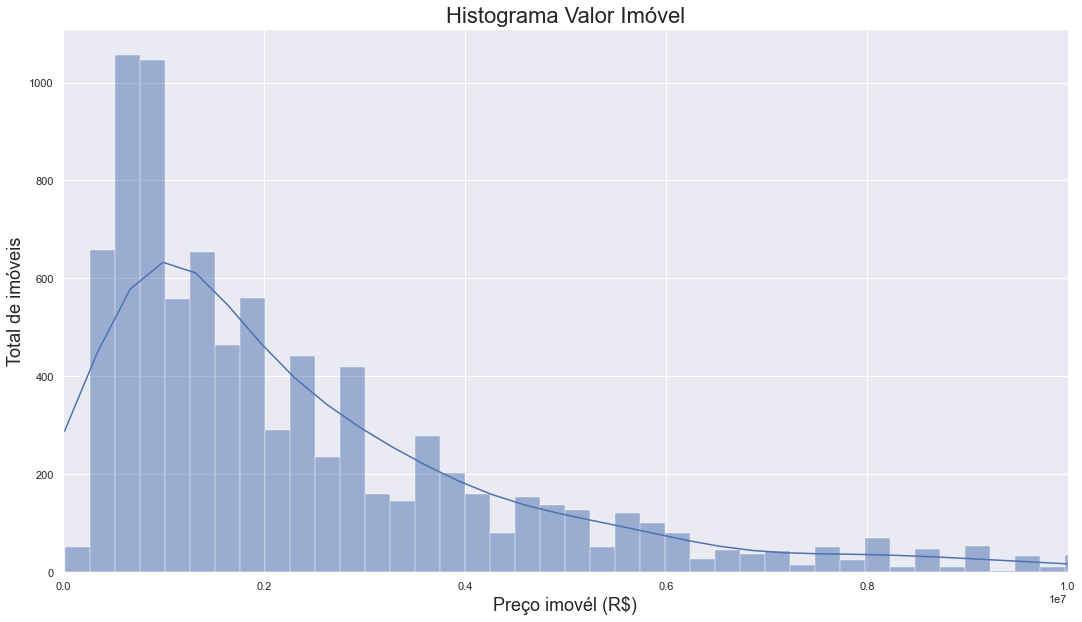

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
plt.figure(figsize=(18, 10))
ax = sns.histplot(data = sp_houses_df, x = "preco_anuncio_float", kde = True)
ax.set_title("Histograma Valor Imóvel", fontsize = 22)
ax.set_xlabel("Preço imovél (R$)", fontsize=18)
ax.set_ylabel("Total de imóveis", fontsize=18)
plt.xlim((-50, 10000000))
plt.show()

 - Maior concentração de imóveis estão na faixa de preço de R$ 1.000.000,00 (um milão de reais).
 - Essa assimetria será tratada no futuro no momento de aplicar técnicas de Machine Learning.

### 4.2 - Boxplots das features dos imóveis

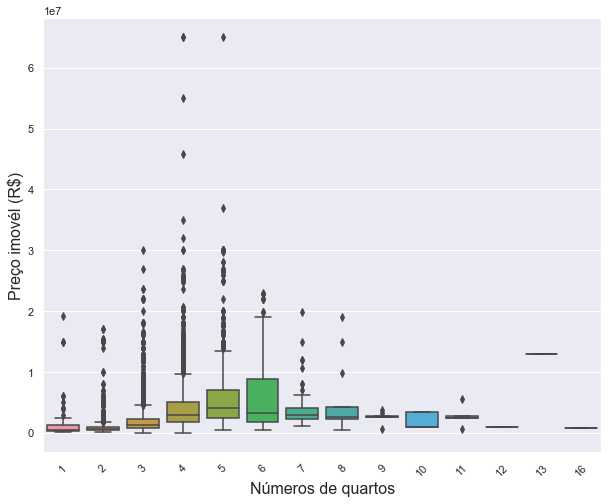

In [7]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data=sp_houses_df, x="quartos_int", y="preco_anuncio_float")
ax.set_xlabel("Números de quartos", fontsize=16)
ax.set_ylabel("Preço imovél (R$)", fontsize=16)
ax.tick_params(axis='x', rotation=45)

 - Em relação ao boxplot de preços e número de quartos, pode-se notar uma alta taxa de outliers nos dados.
 - Uma maior diversidade na faixa de valores está nos imóveis entre 4 e 6 apartamentos.

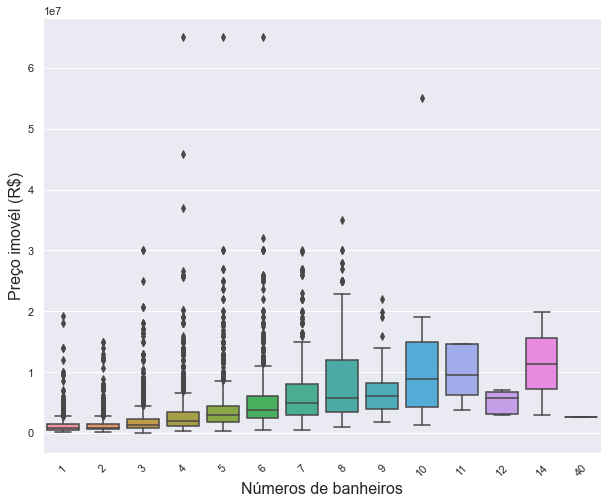

In [8]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data=sp_houses_df, x="banheiros_int", y="preco_anuncio_float")
ax.set_xlabel("Números de banheiros", fontsize=16)
ax.set_ylabel("Preço imovél (R$)", fontsize=16)
ax.tick_params(axis='x', rotation=45)

 - Em relação ao boxplot de preços e número de banheiros, também pode-se notar uma alta taxa de outliers nos dados.
 - Ao contrário do caso anterior (nª de quartos), o número de banheiros tem uma distribuição mais equilibrada em relação ao preço dos imóveis.

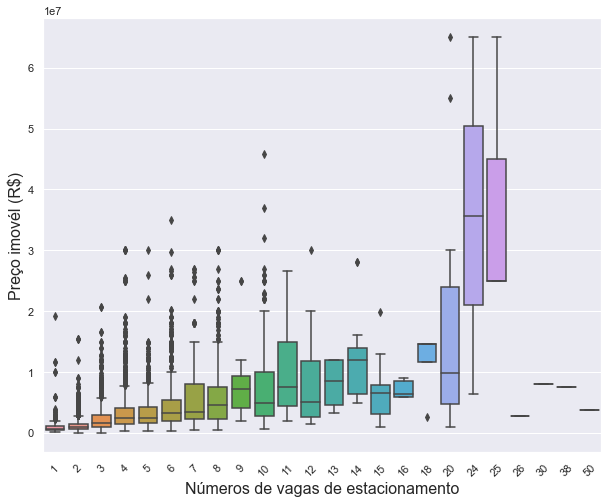

In [9]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data=sp_houses_df, x="vagas_int", y="preco_anuncio_float")
ax.set_xlabel("Números de vagas de estacionamento", fontsize=16)
ax.set_ylabel("Preço imovél (R$)", fontsize=16)
ax.tick_params(axis='x', rotation=45)

 - Em relação ao boxplot de preços e número de quartos, pode-se notar uma certa taxa de outliers nos dados, porém mais reduzida em relação aos casos anteriores.
 - Vale ressaltar que pelo fato de existirem mais categorias, os outliers acabam sendo mais distribuídos ao longo das categorias.
 

### 4.3 - Gráfico de dispersão da área (m²) e o custo dos imóveis (R$)

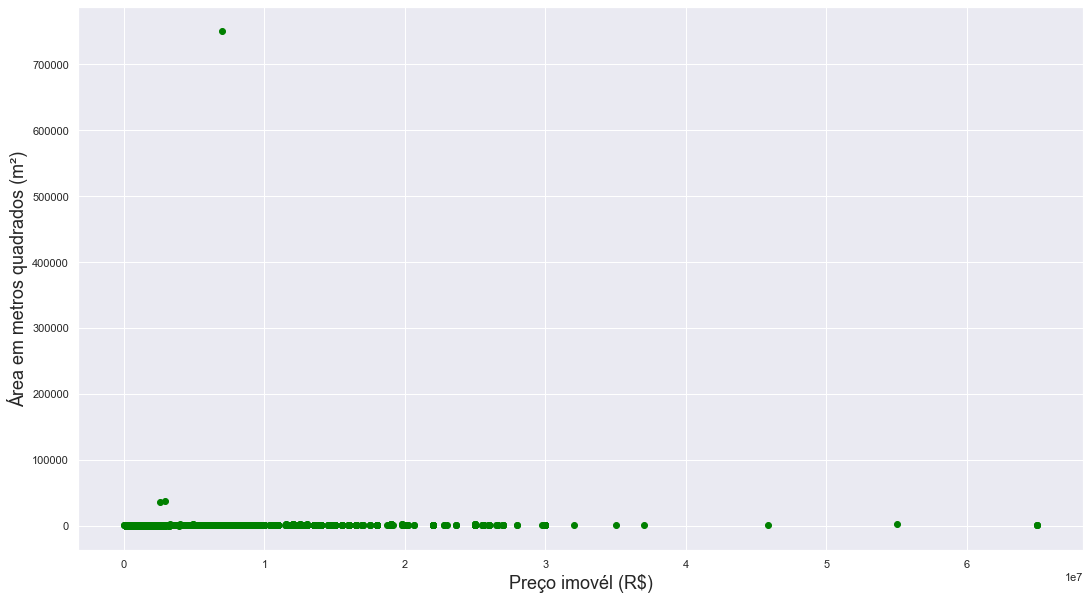

In [10]:
plt.figure(figsize=(18, 10))
plt.scatter(data=sp_houses_df, y="area_metro_quadrado_int", x="preco_anuncio_float", c='green')
plt.xlabel("Preço imovél (R$)", fontsize=18)
plt.ylabel("Área em metros quadrados (m²)", fontsize=18)
plt.show()

- Devido ao fato de que gráficos de dispersão são muito sensíveis a outliers, essa visualização não é tão clara quanto ao propósito de demonstrar a relação do preço do imóvel com a área em m².
- Por conta disso, irei limitar a seleção dos imóveis para a visualização para áreas até 30 mil metros quadrados.

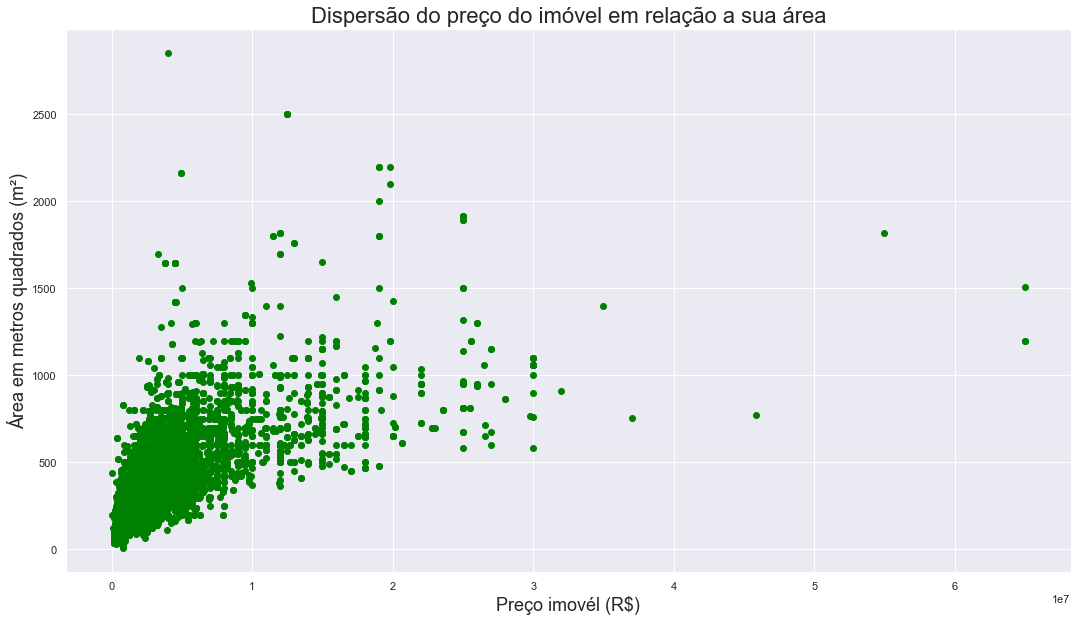

In [11]:
plt.figure(figsize=(18, 10))
plt.scatter(data=sp_houses_df.query("area_metro_quadrado_int <= 30000"),
            y="area_metro_quadrado_int",
            x="preco_anuncio_float", c='green')
plt.title("Dispersão do preço do imóvel em relação a sua área", fontsize=22)
plt.xlabel("Preço imovél (R$)", fontsize=18)
plt.ylabel("Área em metros quadrados (m²)", fontsize=18)
plt.show()

- No que se pode notar na visualização, existe uma alta concentração de imóveis de até 1000 metros quadrados em uma faixa de preço que vai até R$ 10.000.000,00 e uma maior dispersão de imóveis que possuam áreas ou custos maiores que os limites que definem a zona de alta concentração dos dados da visualização.